In [ ]:
import pandas as pd
import plotly.express as px
#import plotly.io as pio
#from IPython.display import Image
#pio.renderers.default = "png"  # Convert plots to static PNG images

## Load the CSV files

In [2]:
df_consumption = pd.read_csv(f"../data/water_consumption_by_second.csv", parse_dates=["second_bucket"])
df_consumption.sort_values("second_bucket", inplace=True)
df_consumption.head()

,second_bucket,pulse_count,liters,inserted_at
0,2025-03-26 19:22:10+01:00,4.0,0.008264,2025-04-03 20:23:14.110 +0200
1,2025-03-26 19:22:11+01:00,0.0,0.000000,2025-04-03 20:23:14.110 +0200
2,2025-03-26 19:22:12+01:00,0.0,0.000000,2025-04-03 20:23:14.110 +0200
3,2025-03-26 19:22:13+01:00,0.0,0.000000,2025-04-03 20:23:14.110 +0200
4,2025-03-26 19:22:14+01:00,0.0,0.000000,2025-04-03 20:23:14.110 +0200


In [3]:
df_events = pd.read_csv("../data/event_labels.csv", parse_dates=["start_timestamp", "end_timestamp"])
df_events.head(20)

,category,tag,start_timestamp,end_timestamp
0,Grifo,NaN,2025-03-26 19:23:29.825000+01:00,2025-03-26 19:23:52.072000+01:00
1,Grifo,NaN,2025-03-26 19:24:11.621000+01:00,2025-03-26 19:24:49.803000+01:00
2,Grifo,NaN,2025-03-26 19:25:20.283000+01:00,2025-03-26 19:25:39.161000+01:00
3,Grifo,NaN,2025-03-26 19:26:19.152000+01:00,2025-03-26 19:28:06.471000+01:00
4,Grifo,NaN,2025-03-26 19:49:45.658000+01:00,2025-03-26 19:50:20.381000+01:00
5,Grifo,NaN,2025-03-26 19:50:53.658000+01:00,2025-03-26 19:51:09.181000+01:00
6,Grifo,NaN,2025-03-26 19:51:23.135000+01:00,2025-03-26 19:51:35.214000+01:00
7,Cisterna,#Mamá,2025-03-26 19:52:02.819000+01:00,2025-03-26 19:52:26.086000+01:00
8,Cisterna,#Hijo,2025-03-26 19:53:22.564000+01:00,2025-03-26 19:53:55.714000+01:00
9,Cisterna,#Hijo,2025-03-26 19:54:00.104000+01:00,2025-03-26 19:55:10.170000+01:00


## Calculate the categories and tags for each second bucket

In [4]:
# Create columns for categories and tags
df_consumption["category_list"] = [[] for _ in range(len(df_consumption))]
df_consumption["tag_list"] = [[] for _ in range(len(df_consumption))]

# Assign categories and tags
for _, event in df_events.iterrows():
    mask = (df_consumption["second_bucket"] >= event["start_timestamp"]) & (df_consumption["second_bucket"] <= event["end_timestamp"])
    df_consumption.loc[mask, "category_list"] = df_consumption.loc[mask, "category_list"].apply(
        lambda x: x + [event["category"]]
    )
    df_consumption.loc[mask, "tag_list"] = df_consumption.loc[mask, "tag_list"].apply(
        lambda x: x + [event["tag"]]
    )

In [5]:
# Fill empty lists with 'Unknown'
df_consumption["category_list"] = df_consumption["category_list"].apply(lambda x: x if x else ["Unknown"])
df_consumption["tag_list"] = df_consumption["tag_list"].apply(lambda x: x if x else ["Unknown"])

# Explode the arrays
df_exploded = df_consumption.explode("category_list").explode("tag_list")

# Split liters evenly among labels
df_exploded["label_count"] = df_exploded.groupby("second_bucket")["category_list"].transform("count")
df_exploded["liters_split"] = df_exploded["liters"] / df_exploded["label_count"]

df_exploded.head()

,second_bucket,pulse_count,liters,inserted_at,category_list,tag_list,label_count,liters_split
0,2025-03-26 19:22:10+01:00,4.0,0.008264,2025-04-03 20:23:14.110 +0200,Unknown,Unknown,1,0.008264
1,2025-03-26 19:22:11+01:00,0.0,0.000000,2025-04-03 20:23:14.110 +0200,Unknown,Unknown,1,0.000000
2,2025-03-26 19:22:12+01:00,0.0,0.000000,2025-04-03 20:23:14.110 +0200,Unknown,Unknown,1,0.000000
3,2025-03-26 19:22:13+01:00,0.0,0.000000,2025-04-03 20:23:14.110 +0200,Unknown,Unknown,1,0.000000
4,2025-03-26 19:22:14+01:00,0.0,0.000000,2025-04-03 20:23:14.110 +0200,Unknown,Unknown,1,0.000000


## Plot Consumption by Category

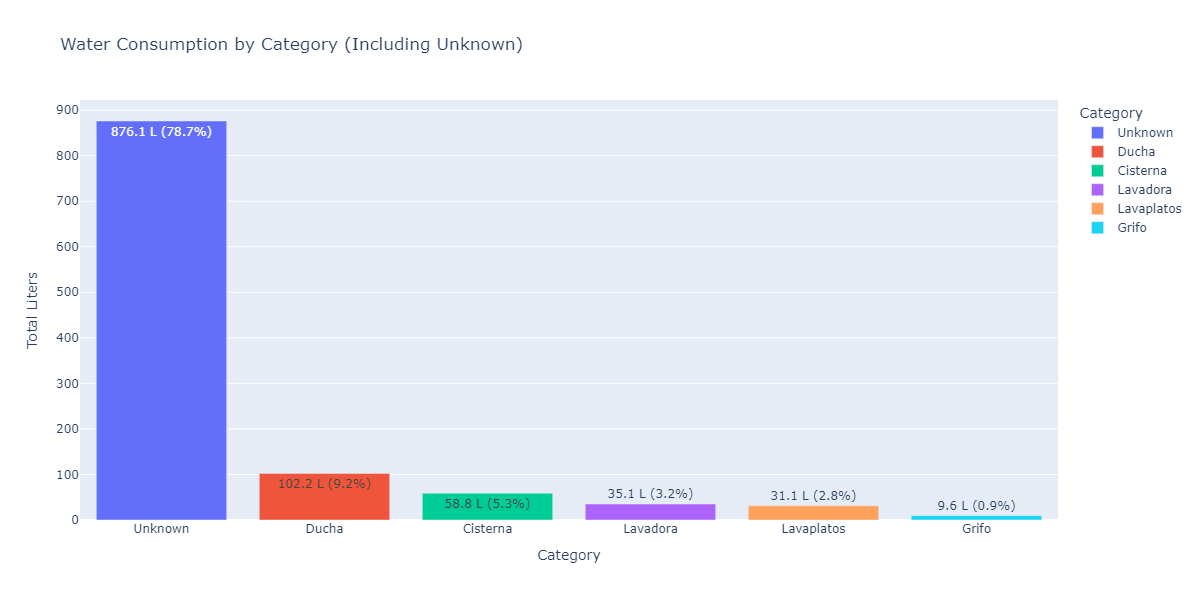

In [ ]:
df_by_category = (
    df_exploded.groupby("category_list", as_index=False)["liters_split"].sum()
    .sort_values("liters_split", ascending=False)
)

total_liters_category = df_by_category["liters_split"].sum()
df_by_category["percent"] = 100 * df_by_category["liters_split"] / total_liters_category
df_by_category["label"] = df_by_category["liters_split"].round(1).astype(str) + " L (" + df_by_category["percent"].round(1).astype(str) + "%)"

fig_cat = px.bar(
    df_by_category,
    x="category_list",
    y="liters_split",
    color="category_list",
    text="label",
    title="Water Consumption by Category (Including Unknown)",
    labels={"category_list": "Category", "liters_split": "Liters"},
)
fig_cat.update_layout(
    xaxis_title="Category",
    yaxis_title="Total Liters",
    height=600,
    width=600*2,
    uniformtext_minsize=8,
    uniformtext_mode='show'
)

fig_cat.show()
#fig_cat.write_image("water-consumption-by-category.png")
#Image("water-consumption-by-category.png")

## Plot Consumption by Tag

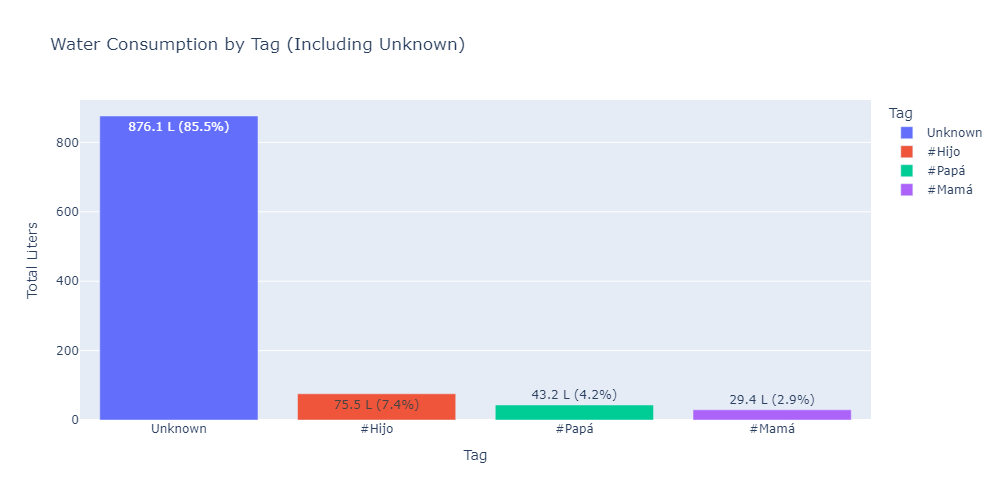

In [ ]:
df_by_tag = (
    df_exploded.groupby("tag_list", as_index=False)["liters_split"].sum()
    .sort_values("liters_split", ascending=False)
)

total_liters_tag = df_by_tag["liters_split"].sum()
df_by_tag["percent"] = 100 * df_by_tag["liters_split"] / total_liters_tag
df_by_tag["label"] = df_by_tag["liters_split"].round(1).astype(str) + " L (" + df_by_tag["percent"].round(1).astype(str) + "%)"

fig_tag = px.bar(
    df_by_tag,
    x="tag_list",
    y="liters_split",
    color="tag_list",
    text="label",
    title="Water Consumption by Tag (Including Unknown)",
    labels={"tag_list": "Tag", "liters_split": "Liters"},
)
fig_tag.update_layout(
    xaxis_title="Tag",
    yaxis_title="Total Liters",
    height=600,
    width=600*2,
    uniformtext_minsize=8,
    uniformtext_mode='show'
)

fig_tag.show()
#fig_tag.write_image("water-consumption-by-tag.png")
#Image("water-consumption-by-tag.png")